<a href="https://colab.research.google.com/github/imazerty/Edge-detection/blob/master/log_transform_BET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# log transform sur la neg_image (255 - img)

(680, 1021, 3)
(680, 1021, 3)


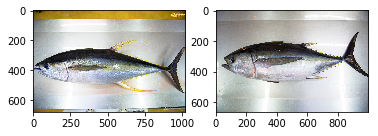

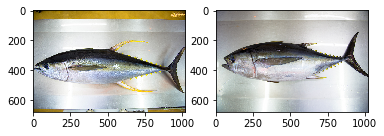

In [12]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt
import cv2

#resize so that the sizes of both images are the same
#shape yft (266, 400,3)
pic1 = imageio.imread('Yellowfin Tuna.jpg')
pic2=imageio.imread('bet.png')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(pic1)
axarr[1].imshow(pic2)

width = pic1.shape[1]
height = pic1.shape[0]
dim = (width, height)
resized = cv2.resize(pic2, dim, interpolation = cv2.INTER_AREA)
print(pic1.shape)
print(resized.shape)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(pic1)
axarr[1].imshow(resized)

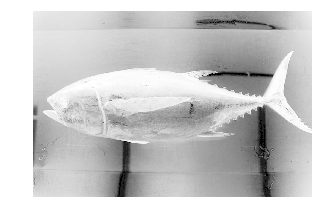

In [13]:
pic = 255 - resized.copy()

gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 


gray1 = gray(pic)


'''
log transform
-> s = c*log(1+r)
So, we calculate constant c to estimate s
-> c = (L-1)/log(1+|I_max|)
'''
max_ = np.max(gray1)

def log_transform(gray1, max_):
    return (255/np.log(1+max_)) * np.log(1+gray1)
plt.figure(figsize = (5,5))
plt.imshow(log_transform(gray1, max_), cmap = plt.get_cmap(name = 'gray'))
plt.axis('off');


# log transform sur img (retenue)

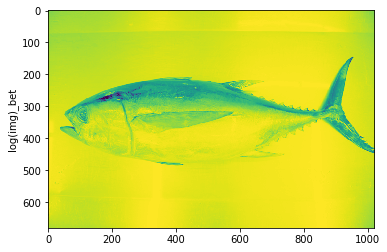

In [14]:
import matplotlib.pyplot as plt


#x1 = np.linspace(0.0, 5.0)
#x2 = np.linspace(0.0, 2.0)

#y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
#y2 = np.cos(2 * np.pi * x2)
"""
plt.subplot(2, 1, 1)
plt.imshow(log_transform(gray1, max_))
plt.title('A tale of 2 subplots')
plt.ylabel('log(neg_img)')

plt.subplot(2, 1, 2)

plt.plot(log_transform(gray2, max_2))
plt.xlabel('time (s)')
plt.ylabel('log(img)')
plt.show()
"""
pic2 = resized.copy()
gray2 = gray(pic2)
max_2 = np.max(gray2)

plt.figure()
plt.imshow(log_transform(gray2, max_2))

plt.ylabel('log(img)_bet')
plt.show()
plt.imsave('log(img)_bet.jpg', log_transform(gray2, max_2))

# Encore plus de log transform par curiosité:

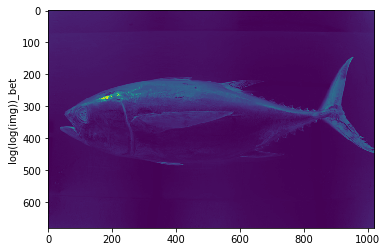

In [23]:

pic3 = imageio.imread('log(img)_bet.jpg')

gray3 = gray(pic3)
max_3 = np.max(gray3)
pic4 = log_transform(gray3, max_3)
plt.figure()
plt.imshow(pic4)

plt.ylabel('log(log(img))_bet')
plt.show()
plt.imsave('log(log(img))_bet.jpg', pic4)

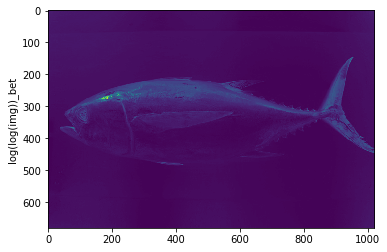

In [21]:
pic4 = imageio.imread('log(log(img))_bet.jpg')
gray4 = gray(pic4)
max_4 = np.max(gray4)



pic5 = log_transform(gray4, max_4)

plt.figure()
plt.imshow(pic5)

plt.ylabel('log(log(img))_bet')
plt.show()
plt.imsave("log(log(log(img)))_bet",pic5)